In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d
from scipy.signal import find_peaks

In [15]:
theta_0 = np.pi / 2 
theta_prime_0 = 0
L = 1  # m
g = 9.8  # m/s^2
T = 2 * np.pi * np.sqrt(L/g)
omega = g/L

print(f"Period predicted by simple pendulum formula is {T}")

Period predicted by simple pendulum formula is 2.007089923154493


In [3]:
def dy_dt(initial, t, delta):
    y1, y2 = initial    
    return [y2, - omega**2 * np.sin(y1) * (1 - delta * np.abs(np.sin(y1)))]

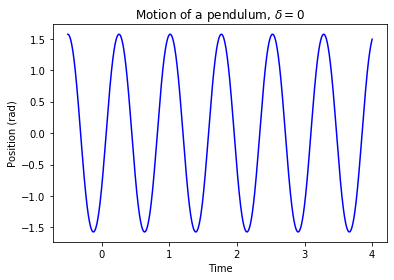

In [12]:
t_start = -0.5
t_end = 4
n = 10000
t = np.linspace(t_start, t_end, n)

y0 = [theta_0, theta_prime_0]
delta = 0

sol = odeint(dy_dt, y0, t, args=(delta,))
plt.plot(t, sol[:, 0], 'b')
plt.title("Motion of a pendulum, $\delta=0$")
plt.xlabel("Time"); plt.ylabel("Position (rad)")
plt.show()

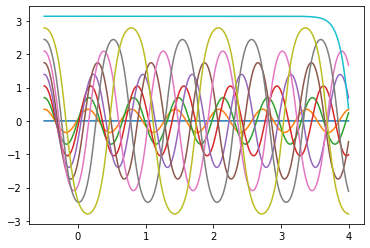

In [24]:
npar = 10
par = np.linspace(1e-4,np.pi, npar)
for i in range(npar):
    y_initial = [par[i], theta_prime_0]
    sol = odeint(dy_dt, y_initial, t, args=(delta,))
    x = sol[:, 0]
    plt.plot(t, x)
    peaks, _ = find_peaks(x, height=0)
    try:
        period = t[peaks][1] - t[peaks][0]
        err = abs(((T - period) / T))
        if err <= 0.01:
            print(f"Period is {round(period, 4)}s at {round(par[i], 4)}rad, err: {round(err, 5)}")
            break
    except IndexError:
        pass  # no peaks
plt.show()

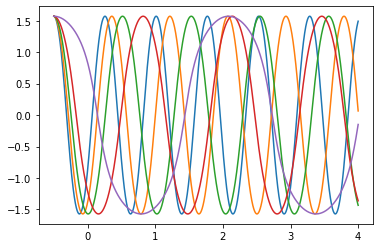

In [27]:
deltas = np.linspace(0.0,0.95,5)
periods = []
for delt in deltas:
    if delt == 1:
        periods.append(0)
        continue
    sol = odeint(dy_dt, y0, t, args=(delt,))
    x = sol[:, 0]
    plt.plot(t, x)
    peaks, _ = find_peaks(x, height=0)
    try:
        period = t[peaks][1] - t[peaks][0]
    except IndexError:
        period = t[peaks][0]
    periods.append(period)
plt.show()

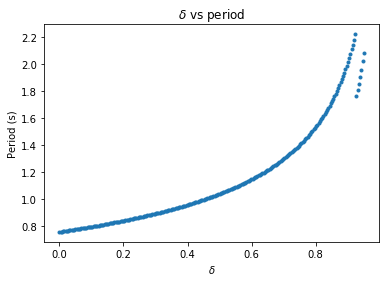

In [20]:
plt.plot(deltas, periods, '.')
plt.title("$\delta$ vs period")
plt.xlabel("$\delta$"); plt.ylabel("Period (s)")
plt.show()

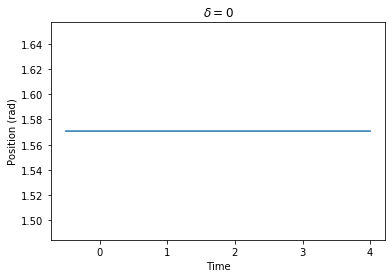

In [8]:
sol = odeint(dy_dt, y0, t, args=(1,))
plt.plot(t, sol[:, 0])
plt.title("$\delta=0$")
plt.xlabel("Time"); plt.ylabel("Position (rad)")
plt.show()

If $\delta$ = 1, the pendulum does not oscillate at all.